In [28]:
import random
import math
import pandas as pd
from collections import OrderedDict
from copy import deepcopy



In [29]:
# simluates a roll of dice
# dice to be kept retain their value, only those nulled (set to 0) will be rolled
def roll(curr_dice):
    i = 0
    for i in range(len(curr_dice)):
        if curr_dice[i]==0:
            curr_dice[i]= random.randint(1,6) 
    return curr_dice

In [30]:
def evaluate_roll(dice_state,counts):
    
    
    evaluation = OrderedDict({
     "is_3_of_a_kind": (0) ,  
     "is_4_of_a_kind": (0) ,      
     "isFullHouse": (0) ,  
     "isSmallStraight": (0) ,  
     "isLargeStraight": (0) , 
     "isYahtzee": (0) ,
     "sum_of_dice" : (0)
     })
    
    evaluation["sum_of_dice"] = sum(dice_state)
    
    is_3_of_a_kind=0
    is_4_of_a_kind=0
    isFullHouse=0
    isSmallStraight=0
    isLargeStraight=0
    isYahtzee=0
    
    if max(counts) >= 3:
        evaluation["is_3_of_a_kind"]=1
    
    if max(counts) >= 4:
        evaluation["is_4_of_a_kind"]=1
        
    if 3 in counts and 2 in counts:
        evaluation["isFullHouse"]=1
    
    if (math.prod(counts[0:4]) or math.prod(counts[1:5]) or math.prod(counts[2:6])) and math.prod(counts) == 0:
        evaluation["isSmallStraight"]=1
    
    if max(counts) == 1 and ( counts[0] == 0 or counts[5] == 0 ):
        evaluation["isLargeStraight"]=1
    
    if max(counts) == 5:
        evaluation["isYahtzee"]=1
    
    return evaluation
    
    

In [31]:
def first_roll_decision(counts,first_roll,first_roll_evaluation):

    for_second_roll=deepcopy(first_roll)

    #no doubles
    if max(counts)==1:
        for_second_roll=[0,0,0,0,0]
    
    
    ## only 1 double
    if counts.count(2)==1 and max(counts)==2:
        #print("only 1 double")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if counts[first_roll[i]-1] != 2:
                for_second_roll[i]=0     

                

    if counts.count(2)==2:
        #print("two doubles - pick one")
        for_second_roll=deepcopy(first_roll)
        for i in range(6,0,-1):
            if first_roll.count(i)==2:
                #print (i)
                if list(game_score.items())[i-1][1][0]==0:
                    for j in range(5):
                        if for_second_roll[j] != i:
                            for_second_roll[j] =0

                    break
        

      ## have 3 of a kind, but try for yahtzee
    if first_roll_evaluation["is_3_of_a_kind"]:
        #print("3_of_a_kind")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if for_second_roll[i] != counts.index(max(counts))+1:
                for_second_roll[i]=0

      ## have 4 of a kind, but try for yahtzee
    if first_roll_evaluation["is_4_of_a_kind"]:
        #print("4_of_a_kind")
        for_second_roll=deepcopy(first_roll)
        for i in range(len(first_roll)):
            if for_second_roll[i] != counts.index(max(counts))+1:
                for_second_roll[i]=0

            
            
    #first of all, if yahtzee, then keep
    if first_roll_evaluation["isYahtzee"]:
        #print("Yahtzee")
        for_second_roll = deepcopy(first_roll)



    
    return for_second_roll

In [32]:
def second_roll_decision(counts2,second_roll,second_roll_evaluation):
    for_third_roll = first_roll_decision(counts2,second_roll,second_roll_evaluation)
 
    return for_third_roll


In [33]:
def one_game():
    pre_score = OrderedDict({
      "upper_1": (0,0) ,
      "upper_2": (0,0) ,
      "upper_3": (0,0) ,
      "upper_4": (0,0) ,
      "upper_5": (0,0) , 
      "upper_6": (0,0) ,  
      "threeOfAKind": (0,0) ,  
      "fourOfAKind": (0,0) ,      
      "fullHouse": (0,0) ,  
      "smallStraight": (0,0) ,  
      "largeStraight": (0,0) ,  
      "chance": (0,0) ,  
      "yahtzee": (0,0) ,  
      "yahtzee_bonus": (0,0),
       "upper_score": (0),
       "upper_bonus": (0,0),
       "bottom_score": (0),
       "total_score": (0)
    })


    global game_score
    
    game_score=deepcopy(pre_score)
    round_count=0
    upper_score=0
    upper_bonus=0
    bottom_score=0
    force_first_round=0
    force_first_round_result=[5,6,6,6,6]

    counts= [0] * 6
    counts2= [0] * 6
    counts3= [0] * 6

    for z in range(13):
        round_count=round_count+1

        ##################
        ## first  roll  ##
        ##################

        first_roll = roll([0,0,0,0,0])
        #print(first_roll)

        for i in range(6):
            counts[i] = first_roll.count(i+1)


        first_roll_evaluation = evaluate_roll(first_roll,counts)

        for_second_roll=[0,0,0,0,0]

        for_second_roll = first_roll_decision(counts,first_roll,first_roll_evaluation)


        ##################
        ## second roll  ##
        ##################

        second_roll=roll(for_second_roll[:])
        #print(second_roll)

        for i in range(6):
            counts2[i] = second_roll.count(i+1)

        second_roll_evaluation = evaluate_roll(second_roll,counts2)

        for_third_roll=[0,0,0,0,0]

        for_third_roll = second_roll_decision(counts2,second_roll,second_roll_evaluation)


        ##################
        ## second roll  ##
        ##################



        if force_first_round==1:
            third_roll=force_first_round_result
        else:
            third_roll=roll(for_third_roll[:])

        #print(third_roll)

        for i in range(6):
            counts3[i] = third_roll.count(i+1)

        third_roll_evaluation = evaluate_roll(third_roll,counts3)




        ############################
        ## select score for round ##
        ############################



          # if have yahtzee then add  yahtzee bonus, but is also scored elsewhere, too
        if game_score['yahtzee'][1]==50:
            if third_roll_evaluation["isYahtzee"]:
                #bonus yahtzee
                game_score['yahtzee_bonus'] = (game_score['yahtzee_bonus'][0]+1,game_score['yahtzee_bonus'][1]+100)
    

                #also score yahtzee joker rules (original rules)
                third_roll_evaluation["isLargeStraight"]=1
                third_roll_evaluation["isSmallStraight"]=1
                third_roll_evaluation["isFullHouse"]=1



        if third_roll_evaluation["isYahtzee"] and game_score['yahtzee'][0]==0:
            game_score['yahtzee']=(1,50)
            #print('Yahtzee')

        elif  third_roll_evaluation["isLargeStraight"] and game_score['largeStraight'][0]==0:
            game_score['largeStraight']=(1,40)
            #print('large straight')

        elif  third_roll_evaluation["isSmallStraight"] and game_score['smallStraight'][0]==0:
            game_score['smallStraight']=(1,30)
            #print('small straight')
            
            
############################################################
        elif  third_roll_evaluation["isFullHouse"] and game_score['fullHouse'][0]==0:
            game_score['fullHouse']=(1,25)
            #print('full house')
############################################################
      
            
############################################################       
############       
        elif  third_roll_evaluation["is_4_of_a_kind"] and list(game_score.items())[counts3.index(max(counts3))][1][0] ==0:
            game_score[list(game_score.items())[counts3.index(max(counts3))][0]]=(1,(counts3.index(max(counts3))+1)*max(counts3))
            #print('four of a kind')
############       

        elif  third_roll_evaluation["is_4_of_a_kind"] and game_score['fourOfAKind'][0]==0 and third_roll_evaluation["sum_of_dice"] > 10:
            game_score['fourOfAKind']=(1,third_roll_evaluation["sum_of_dice"])
            #print('four of a kind')

        elif  third_roll_evaluation["is_3_of_a_kind"] and  list(game_score.items())[counts3.index(max(counts3))][1][0] ==0:
            game_score[list(game_score.items())[counts3.index(max(counts3))][0]]=(1,(counts3.index(max(counts3))+1)*max(counts3))
            #print('upper - ' + str(counts3.index(max(counts3))+1))

        elif  third_roll_evaluation["is_3_of_a_kind"] and third_roll_evaluation["sum_of_dice"] > 16 and game_score['threeOfAKind'][0]==0:
            game_score['threeOfAKind']=(1,third_roll_evaluation["sum_of_dice"])
            #print('three of a kind')
############################################################



######################################################
        elif third_roll.count(1) ==2 and game_score["upper_1"][0]==0:
            game_score["upper_1"]=(1,2)
            #print ("upper 1")

        elif third_roll.count(2) ==2 and game_score["upper_2"][0]==0:
            game_score["upper_2"]=(1,4)
            #print ("upper 2")

        elif third_roll.count(3) ==2 and game_score["upper_3"][0]==0:
            game_score["upper_3"]=(1,6)
            #print ("upper 3")

        elif third_roll.count(4) ==2 and game_score["upper_4"][0]==0:
            game_score["upper_4"]=(1,8)
            #print ("upper 4")

        elif third_roll.count(5) ==2 and game_score["upper_5"][0]==0:
            game_score["upper_5"]=(1,10)
            #print ("upper 5")

        elif third_roll.count(6) ==2 and game_score["upper_6"][0]==0:
            game_score["upper_6"]=(1,12)
            #print ("upper 6")
############################################################


############################################################
            #Chance 1
        elif game_score["chance"][0]==0 and third_roll_evaluation["sum_of_dice"] > 16:
            game_score['chance']=(1,third_roll_evaluation["sum_of_dice"])
            #print('chance')
############################################################


            #nowhere else to put it, 0 in for Large Straight
        elif game_score["largeStraight"][0]==0:
            game_score['largeStraight']=(1,0)
            #print('large straight scratch')

            #nowhere else to put it, 0 in for Small  Straight
        elif game_score["smallStraight"][0]==0:
            game_score['smallStraight']=(1,0)
            #print('small straight scratch')

            #Chance 2
        elif game_score["chance"][0]==0:
            game_score['chance']=(1,third_roll_evaluation["sum_of_dice"])
            #print('chance')

            #scratch fourOfAKind
        elif game_score["fourOfAKind"][0]==0:
            game_score['fourOfAKind']=(1,0)
            #print('fourOfAKind scratch')

            #scratch yahtzee
        elif game_score["threeOfAKind"][0]==0:
            game_score['threeOfAKind']=(1,0)
            #print('threeOfAKind scratch')



        ###########################################
        elif game_score["upper_1"][0]==0:
            game_score['upper_1']=(1,third_roll.count(1)*1)
            #print('upper_1')
        ###########################################



        ###########################################

        elif game_score["upper_2"][0]==0:
            game_score['upper_2']=(1,third_roll.count(2)*2)
            #print('upper_2')

        #######################################
            #scratch yahtzee
        elif game_score["yahtzee"][0]==0:
            game_score['yahtzee']=(1,0)
            #print('yahtzee scratch')

            #scratch fullHouse
        elif game_score["fullHouse"][0]==0:
            game_score['fullHouse']=(1,0)
            #print('fullHouse scratch')    

        ##########################################

        elif game_score["upper_3"][0]==0:
            game_score['upper_3']=(1,third_roll.count(3)*3)
            #print('upper_3')

        elif game_score["upper_4"][0]==0:
            game_score['upper_4']=(1,third_roll.count(4)*4)
            #print('upper_4')

        elif game_score["upper_5"][0]==0:
            game_score['upper_5']=(1,third_roll.count(5)*5)
            #print('upper_5')

        elif game_score["upper_6"][0]==0:
            game_score['upper_6']=(1,third_roll.count(6)*6)
            #print('upper_6')

        #game_score




            # 4x to 4 of a kind??? or upper
            # remove "go for full house"


        if round_count == 13:
            for i in range(6):
                upper_score = upper_score + list(game_score.items())[i][1][1]
                
            game_score['upper_score']=(upper_score)

            if upper_score >= 63:
                upper_bonus = 35
                game_score['upper_bonus']=(1,35)
                

            for i in range(6,14):
                bottom_score = bottom_score + list(game_score.items())[i][1][1]

            game_score['bottom_score']=(bottom_score)
            
            total_score = upper_score + upper_bonus + bottom_score
            
            game_score['total_score']=(total_score)
          
            

            #print ("Upper Score =   " + str(upper_score))
            #print ("Upper Bonus =    " + str(upper_bonus))
            #print ("Bottom Score =  " + str(bottom_score))
            #print ("=============== " )
            #print ("Total Score =   " + str(total_score))

    return game_score    

#### running the simulation

In [34]:
reps=250000
random.seed(8675309)
#############
#random.seed(2)
############

upper_1 = [0] * reps
upper_2 = [0] * reps
upper_3 = [0] * reps
upper_4 = [0] * reps
upper_5 = [0] * reps
upper_6 = [0] * reps
threeOfAKind = [0] * reps
fourOfAKind = [0] * reps
fullHouse = [0] * reps
smallStraight = [0] * reps
largeStraight = [0] * reps
chance = [0] * reps
yahtzee = [0] * reps
yahtzee_bonus = [0] * reps
upper_score = [0] * reps
upper_bonus = [0] * reps
bottom_score = [0] * reps
total_score = [0] * reps
upper_bonus_flag = [0] * reps
threeOfAKind_flag = [0] * reps
fourOfAKind_flag = [0] * reps
fullHouse_flag = [0] * reps
smallStraight_flag = [0] * reps
largeStraight_flag = [0] * reps
yahtzee_flag = [0] * reps
yahtzee_bonus_flag = [0] * reps

In [35]:
for j in range(reps):
    result=one_game()
    
    upper_1[j]=result["upper_1"][1]
    upper_2[j]=result["upper_2"][1]
    upper_3[j]=result["upper_3"][1]
    upper_4[j]=result["upper_4"][1]
    upper_5[j]=result["upper_5"][1]
    upper_6[j]=result["upper_6"][1]
    threeOfAKind[j]=result["threeOfAKind"][1]
    fourOfAKind[j]=result["fourOfAKind"][1]
    fullHouse[j]=result["fullHouse"][1]
    smallStraight[j]=result["smallStraight"][1]
    largeStraight[j]=result["largeStraight"][1]
    chance[j]=result["chance"][1]
    yahtzee[j]=result["yahtzee"][1]
    yahtzee_bonus[j]=result["yahtzee_bonus"][1]
    upper_score[j]=result["upper_score"]
    upper_bonus[j]=result["upper_bonus"][1]
    bottom_score[j]=result["bottom_score"]
    total_score[j]=result["total_score"]
    upper_bonus_flag[j]=result["upper_bonus"][0]

    if result["threeOfAKind"][1] > 0:
        threeOfAKind_flag[j]=1

    if result["fourOfAKind"][1] > 0:
        fourOfAKind_flag[j]=1

    if result["fullHouse"][1] > 0:
        fullHouse_flag[j]=1

    if result["smallStraight"][1] > 0:
        smallStraight_flag[j]=1

    if result["largeStraight"][1] > 0:
        largeStraight_flag[j]=1

    if result["yahtzee"][1] > 0:
        yahtzee_flag[j]=1

    yahtzee_bonus_flag[j]=result["yahtzee_bonus"][0]
   

In [36]:
resultDict=OrderedDict(
{
'upper_1':upper_1,
'upper_2':upper_2,
'upper_3':upper_3,
'upper_4':upper_4,
'upper_5':upper_5,
'upper_6':upper_6,
'threeOfAKind':threeOfAKind,
'fourOfAKind':fourOfAKind,
'fullHouse':fullHouse,
'smallStraight':smallStraight,
'largeStraight':largeStraight,
'chance':chance,
'yahtzee':yahtzee,
'yahtzee_bonus':yahtzee_bonus,
'upper_score':upper_score,
'upper_bonus':upper_bonus,
'bottom_score':bottom_score,
'total_score':total_score,
'upper_bonus_flag':upper_bonus_flag,
'threeOfAKind_flag':threeOfAKind_flag,
'fourOfAKind_flag':fourOfAKind_flag,
'fullHouse_flag':fullHouse_flag,
'smallStraight_flag':smallStraight_flag,
'largeStraight_flag':largeStraight_flag,
'yahtzee_flag':yahtzee_flag,
'yahtzee_bonus_flag':yahtzee_bonus_flag
    
    
})

In [37]:
results = pd.DataFrame.from_dict(resultDict)

In [38]:
results.describe()

,upper_1,upper_2,upper_3,upper_4,upper_5,upper_6,threeOfAKind,fourOfAKind,fullHouse,smallStraight,...,bottom_score,total_score,upper_bonus_flag,threeOfAKind_flag,fourOfAKind_flag,fullHouse_flag,smallStraight_flag,largeStraight_flag,yahtzee_flag,yahtzee_bonus_flag
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.00000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.632940,5.351424,8.303556,11.201776,14.152760,17.155464,15.841536,12.448612,17.05790,6.456600,...,106.207716,177.504556,0.357112,0.733576,0.621084,0.682316,0.215220,0.051160,0.417340,0.125036
std,1.082155,2.120968,2.997292,3.931756,4.781807,5.632934,9.902745,10.596845,11.63942,12.329271,...,65.822033,69.366515,0.479149,0.442089,0.485118,0.465577,0.410976,0.220324,0.493121,0.390029
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,6.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,6.000000,8.000000,10.000000,12.000000,0.000000,0.000000,0.00000,0.000000,...,66.000000,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,6.000000,9.000000,12.000000,15.000000,18.000000,20.000000,14.000000,25.00000,0.000000,...,90.000000,165.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,6.000000,9.000000,12.000000,20.000000,24.000000,23.000000,22.000000,25.00000,0.000000,...,123.000000,199.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,5.000000,10.000000,15.000000,20.000000,25.000000,30.000000,30.000000,30.000000,25.00000,30.000000,...,719.000000,817.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [39]:
results.to_csv('iter4.csv')

In [40]:
results.describe().to_csv('describe_it_4_.csv')

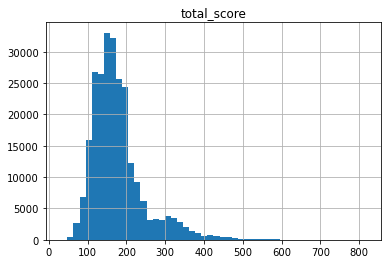

In [41]:
hist = results.hist(column='total_score',bins=50)

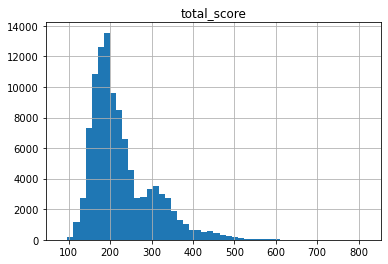

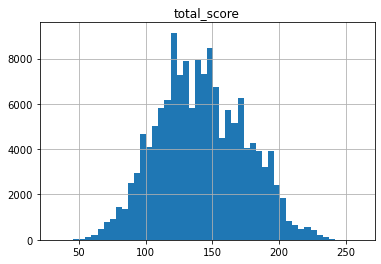

In [42]:
hist = results[results["yahtzee_flag"] > 0].hist(column='total_score',bins=50)
hist = results[results["yahtzee_flag"] == 0].hist(column='total_score',bins=50)


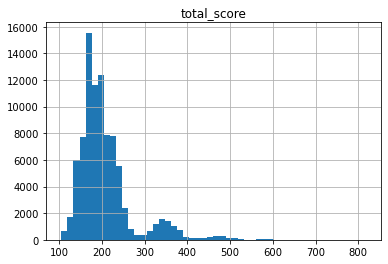

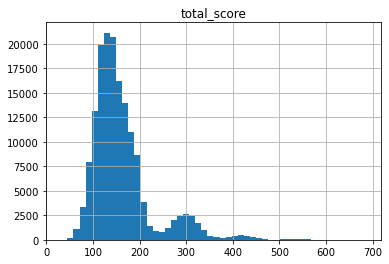

In [43]:
hist = results[results["upper_bonus_flag"] == 1].hist(column='total_score',bins=50)
hist = results[results["upper_bonus_flag"] == 0].hist(column='total_score',bins=50)


array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

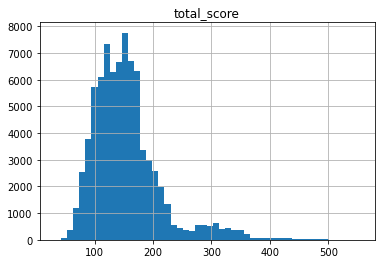

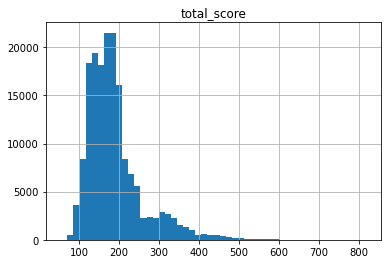

In [44]:
results[results["fullHouse_flag"] == 0].hist(column='total_score',bins=50)
results[results["fullHouse_flag"] == 1].hist(column='total_score',bins=50)


array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

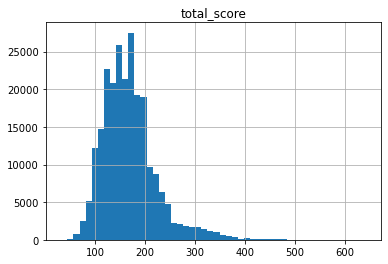

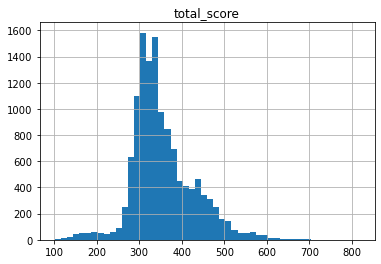

In [45]:
results[results["largeStraight_flag"] == 0].hist(column='total_score',bins=50)
results[results["largeStraight_flag"] == 1].hist(column='total_score',bins=50)

array([[<AxesSubplot:title={'center':'total_score'}>]], dtype=object)

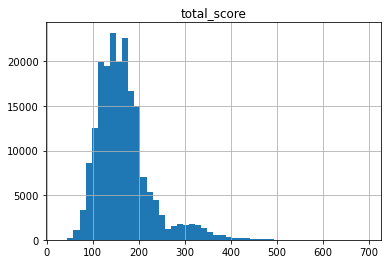

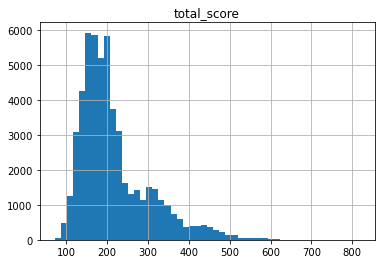

In [46]:
results[results["smallStraight_flag"] == 0].hist(column='total_score',bins=50)
results[results["smallStraight_flag"] == 1].hist(column='total_score',bins=50)

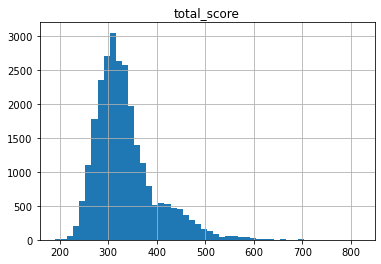

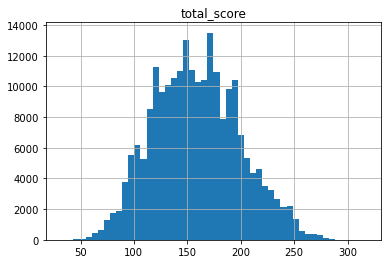

In [47]:
hist = results[results["yahtzee_bonus_flag"] > 0].hist(column='total_score',bins=50)
hist = results[results["yahtzee_bonus_flag"] == 0].hist(column='total_score',bins=50)


In [48]:
results[results["yahtzee_bonus_flag"] > 0] #.to_csv('pit.csv')

,upper_1,upper_2,upper_3,upper_4,upper_5,upper_6,threeOfAKind,fourOfAKind,fullHouse,smallStraight,...,bottom_score,total_score,upper_bonus_flag,threeOfAKind_flag,fourOfAKind_flag,fullHouse_flag,smallStraight_flag,largeStraight_flag,yahtzee_flag,yahtzee_bonus_flag
15,0,8,6,16,15,18,25,29,25,30,...,278,376,1,1,1,1,1,0,1,1
23,3,6,9,12,20,12,21,21,0,0,...,249,311,0,1,1,0,0,1,1,1
35,3,6,9,16,10,18,0,18,25,0,...,206,268,0,0,1,1,0,0,1,1
45,4,6,6,8,10,18,25,21,25,0,...,376,428,0,1,1,1,0,1,1,2
46,3,6,6,12,20,18,0,0,25,0,...,188,288,1,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249957,2,2,0,16,15,24,19,19,25,0,...,237,296,0,1,1,1,0,0,1,1
249965,0,6,9,8,15,18,19,13,25,0,...,268,324,0,1,1,1,0,1,1,1
249969,3,8,6,8,15,12,0,0,0,0,...,210,262,0,0,0,0,0,1,1,1
249974,3,6,12,8,15,24,0,24,25,30,...,376,479,1,0,1,1,1,1,1,2


In [49]:
results[results["total_score"] <= 60] #.to_csv('terrible_2.csv')

,upper_1,upper_2,upper_3,upper_4,upper_5,upper_6,threeOfAKind,fourOfAKind,fullHouse,smallStraight,...,bottom_score,total_score,upper_bonus_flag,threeOfAKind_flag,fourOfAKind_flag,fullHouse_flag,smallStraight_flag,largeStraight_flag,yahtzee_flag,yahtzee_bonus_flag
583,4,4,6,8,10,18,0,0,0,0,...,9,59,0,0,0,0,0,0,0,0
1256,2,6,6,8,15,0,0,0,0,0,...,16,53,0,0,0,0,0,0,0,0
2633,3,6,12,8,0,18,0,0,0,0,...,12,59,0,0,0,0,0,0,0,0
2986,2,4,9,12,15,0,0,0,0,0,...,8,50,0,0,0,0,0,0,0,0
4236,3,4,6,0,10,18,0,0,0,0,...,14,55,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246362,3,6,6,0,20,0,0,0,0,0,...,9,44,0,0,0,0,0,0,0,0
247255,3,8,6,8,0,0,21,0,0,0,...,30,55,0,1,0,0,0,0,0,0
249057,4,4,12,12,10,0,0,0,0,0,...,18,60,0,0,0,0,0,0,0,0
249063,4,4,9,8,15,0,0,0,0,0,...,11,51,0,0,0,0,0,0,0,0


In [51]:
results[results["total_score"] <= 60].to_csv('terrible_4.csv')